# 기간 및 시간별 결제 및 환불 요인 분석
<br>
<br>

**completed_at 컬럼을 기준으로 월, 요일, 시간별로 결제 및 환불 동향을 파악하여**

**기존 고객 유지 방안과 매출을 증대를 위한 전략의 아이디어을 얻기 위함**

## Importing the library

**라이브러리**
<br>
<br>
1. 기본
* numpy
* pandas

2. 날짜 / 달력
* calendar

3. 컬럼 분석
* pandas_profiling
* IPython.display

4. 카테고리 명 분석
* wordcloud
* PIL

5. 데이터 시각화
* seaborn
* matplotlib
* plotly

6. 현재 디렉토리 파일 목록 출력
* subprocess

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Report
import pandas_profiling
from IPython.display import display

# WordCloud
from wordcloud import WordCloud
## from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from PIL import Image

import plotly.express as px
from plotly.subplots import make_subplots
## import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [2]:
from subprocess import check_output
print(check_output(["ls","./"]).decode("utf8"))
plt.rcParams['font.family'] = 'AppleGothic'

AppleGothic.ttf
apr.png
jul.png
mar.jpeg
may.png
sep.png
패캠_미니프로젝트_최종_최선우 part.ipynb
책_검은배경.jpeg
미니프젝_패캠_용성(최종).ipynb
패캠_미니프로젝트_최종.ipynb
파이널프로젝트_RAW_210329_210926.xlsx



## Dataset

In [3]:
df = pd.read_excel("./파이널프로젝트_RAW_210329_210926.xlsx")

In [4]:
df.head()

id  customer_id  course_id     type      state  \
0  970634     504760.0   201435.0    ORDER  CANCELLED   
1  970650     432862.0   203178.0    ORDER  CANCELLED   
2  970657      72297.0   204246.0  PAYMENT  COMPLETED   
3  970656      72297.0   204246.0    ORDER  CANCELLED   
4  970658     478028.0   201797.0  PAYMENT  COMPLETED   

                    course_title category_title  format        completed_at  \
0      올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원 2021-03-28 15:00:11   
1    초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원 2021-03-28 15:16:53   
2           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
3           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
4  올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX         업무 생산성     올인원 2021-03-28 15:21:54   

   transaction_amount              coupon_title  coupon_discount_amount  \
0               90500                       NaN                     NaN   
1               96000                       NaN                     NaN   
2              171810     [10% 할인] 시크릿코드 실무 완성편                 19090.0   
3              171810                       NaN                     NaN   
4               97500  [웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                 20000.0   

   sale_price  tax_free_amount   pg method subcategory_title  \
0    110500.0         110500.0  NaN  VBANK           개발자 커리어   
1    116000.0         116000.0  NaN   CARD             영상 편집   
2    190900.0         190900.0  NaN   CARD               NaN   
3    190900.0         190900.0  NaN   CARD               NaN   
4    117500.0         117500.0  NaN   CARD           PPT/보고서   

  marketing_start_at  
0                NaT  
1         2020-12-02  
2         2021-03-04  
3         2021-03-04  
4         2019-11-14

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [6]:
report = pandas_profiling.ProfileReport(df)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data preprocessing

### 데이터 전처리

**데이터 전처리**

데이터를 분석하기에 앞서 데이터 전처리는 아래와 같이 처리하였습니다.

1.   Type 컬럼의 PAYMENT(결제)와 REFUND(환불)을 제외한 나머지 값들을 제거.
2.   State 컬럼의 COMPLETED만 남기기
3.   Course_title 컬럼의 결측치 전부 제거
4.   Category_title 컬럼의 '데이터 사이언스'와 '데이터사이언스' 값을 '데이터사이언스'로 통일
5.   Id 1078156 제거
6.   id 1212937, 1223480인 category_title 결측치값을 데이터사이언스로 변경
7.   Format 컬럼의 결측치 전부 제거
8.   Category_title 컬럼의 '관리'값 제거
9.   Course_id 컬럼의 결측치 값을 전부 0으로 변경
10.   Course_id, Customer_id 컬럼의 데이터 타입을 변경 (실수형 -> 정수형으로)

In [7]:
# 1. type
## payment 와 refund만 보기
drop_type = df[(df['type'] != 'PAYMENT') & (df['type'] != 'REFUND')].index
df = df.drop(drop_type, axis="index")

# 2. state
## COMPLETED 만 보기
drop_state = df[(df['state'] != 'COMPLETED')].index
df = df.drop(drop_state, axis="index")

# 3. course_title
## 결측치 제거
df = df.dropna(subset=['course_title']).reset_index()

# 4. category_title
## 데이터 사이언스 -> 데이터사이언스로 변경, 띄어쓰기 제거
df.loc[df['category_title'] == '데이터 사이언스', 'category_title'] = '데이터사이언스'

## id 1078156 제거
drop_id = df[df['id'] == 1078156].index
df = df.drop(drop_id, axis="index")

## id 1212937, 1223480 데이터사이언스로 채워넣기
df.loc[df["id"] == 1212937, "category_title"] = "데이터사이언스"
df.loc[df["id"] == 1223480, "category_title"] = "데이터사이언스"

# 5. format
## 결측치 제거
df = df.dropna(subset=['format'])

# 6. category_title
## 관리 제거
drop_category_title = df[df['category_title'] == '관리'].index
df = df.drop(drop_category_title, axis="index")

# course_id 결측치 전부 0으로 추가
df['course_id'] = df['course_id'].fillna(0)

# course_id, customer_id 모두 데이터 타입 정수로 변경
df = df.astype({'customer_id' : 'int64', 'course_id' : 'int64'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56721 entries, 0 to 56722
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   56721 non-null  int64         
 1   id                      56721 non-null  int64         
 2   customer_id             56721 non-null  int64         
 3   course_id               56721 non-null  int64         
 4   type                    56721 non-null  object        
 5   state                   56721 non-null  object        
 6   course_title            56721 non-null  object        
 7   category_title          56721 non-null  object        
 8   format                  56721 non-null  object        
 9   completed_at            56721 non-null  datetime64[ns]
 10  transaction_amount      56721 non-null  int64         
 11  coupon_title            23761 non-null  object        
 12  coupon_discount_amount  23761 non-null  float6

### 컬럼 추가

**새로운 컬럼 추가**

1.   **category_title의 분류가 겹치는 부분이 많아 크게 4가지로 분류하여 새로운 컬럼에 값을 추가하였습니다.**
     *   big_category_title 컬럼 생성
         *   투자/재태크, 부동산/금융, 파이낸스, 지식콘텐츠를 'finance'로 통일
         *   크리에이티브, 디자인, 마케팅, 영상/3D를 'design'으로 통일
         *   프로그래밍, 데이터사이언스를 'programming'으로 통일
         *   업무 생산성, 비즈니스, 교육을 'business'로 통일
2.   편하게 합산하기 위해 새로운 컬럼 생성
     *   Is_payment, is_refund 컬럼 생성
         *   is_payment : Payment일 때 값 1 아니면 0
         *   is_refund : Refund일 때 값 1 아니면  0
     *   is_finance, is_design, is_programming, is_business 컬럼 생성
         *   is_finance : big_category_title이 finance일 때 1 아니면 0
         *   is_design : big_category_title이 design일 때 1 아니면 0
         *   is_programming : big_category_title이 programming일 때 1 아니면 0
         *   is_business : big_category_title이 business일 때 1 아니면 0
     *   year, quarter, month, week, hour 컬럼 생성
         *   year : completed_at(결제시간)에서 년도만 추출한 값
         *   quarter : completed_at(결제시간)에서 년도를 4분기로 나눈 값
         *   month : completed_at(결제시간)에서 월만 추출한 값
         *   week : completed_at(결제시간)에서 주만 추출한 값
         *   hour : completed_at(결제시간)에서 시간만 추출한 값

In [9]:
# 카테고리 타이틀을 큰 카테고리 타이틀로 새로운 컬럼에 통합하는 함수

def add_category(df):
    text = df
    if (text == '투자/재테크') or (text == '부동산/금융') or (text == '파이낸스') or (text == '지식콘텐츠'):
        return 'finance'
    elif (text == '크리에이티브') or (text == '디자인') or (text == '마케팅') or (text == '영상/3D'):
        return 'design'
    elif (text == '프로그래밍') or (text == '데이터사이언스'):
        return 'programming'
    elif (text == '업무 생산성') or (text == '비즈니스') or (text == '교육'):
        return 'business'
    else:
        return '기타'

df['big_category_title'] = df['category_title'].apply(add_category)    

In [10]:
# 결제 및 환불 건수에 대한 조건
df['is_payment'] = np.where(df['type'] == 'PAYMENT', 1, 0)
df['is_refund'] = np.where(df['type'] == 'REFUND', 1, 0)

# 카테고리별 건수에 대한 컬럼 추가
df['is_finance'] = np.where(df['big_category_title'] == 'finance', 1, 0)
df['is_design'] = np.where(df['big_category_title'] == 'design', 1, 0)
df['is_programming'] = np.where(df['big_category_title'] == 'programming', 1, 0)
df['is_business'] = np.where(df['big_category_title'] == 'business', 1, 0)


# 날짜 및 시간 컬럼 추가
df['year'] = df['completed_at'].dt.year
df['month'] = df['completed_at'].dt.month
df['week'] = df['completed_at'].dt.isocalendar().week
df['quarter'] = df['completed_at'].dt.quarter
df['day_of_week'] = df['completed_at'].dt.day_name()
df['hour'] = df['completed_at'].dt.hour
df[:2]

index      id  customer_id  course_id     type      state  \
0      2  970657        72297     204246  PAYMENT  COMPLETED   
1      4  970658       478028     201797  PAYMENT  COMPLETED   

                    course_title category_title  format        completed_at  \
0           시크릿코드 : 프론트엔드 실무 완성편          프로그래밍  스쿨 온라인 2021-03-28 15:21:43   
1  올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX         업무 생산성     올인원 2021-03-28 15:21:54   

   ...  is_finance is_design  is_programming  is_business  year month week  \
0  ...           0         0               1            0  2021     3   12   
1  ...           0         0               0            1  2021     3   12   

  quarter day_of_week hour  
0       1      Sunday   15  
1       1      Sunday   15  

[2 rows x 32 columns]

### 조건

In [11]:
# 월 판별 조건
mar = df['month'] == 3
apr = df['month'] == 4
may = df['month'] == 5
jun = df['month'] == 6
jul = df['month'] == 7
aug = df['month'] == 8
sep = df['month'] == 9

# type 조건
payment = df['type'] == 'PAYMENT'
refund = df['type'] == 'REFUND'

# Category_title 조건
finance = (df['big_category_title'] == 'finance')
design = (df['big_category_title'] == 'design')
programming = (df['big_category_title'] == 'programming')
business = (df['big_category_title'] == 'business')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56721 entries, 0 to 56722
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   56721 non-null  int64         
 1   id                      56721 non-null  int64         
 2   customer_id             56721 non-null  int64         
 3   course_id               56721 non-null  int64         
 4   type                    56721 non-null  object        
 5   state                   56721 non-null  object        
 6   course_title            56721 non-null  object        
 7   category_title          56721 non-null  object        
 8   format                  56721 non-null  object        
 9   completed_at            56721 non-null  datetime64[ns]
 10  transaction_amount      56721 non-null  int64         
 11  coupon_title            23761 non-null  object        
 12  coupon_discount_amount  23761 non-null  float6

## Data analysis

**데이터 분석 순서**

1.   전체통계(2021년)
     *   전체 고객수, 전체 강의수, 결제건수, 환불건수
     *   카테고리별 전체 건수
2.   월별 통계(3월, 4월, 5월, 6월, 7월, 8월, 9월)
     *   결제 관련
         *   매출금액
         *   카테고리
         *   강의 ID Top 10
         *   강의명
     *   환불 관련
         *   환불 건수
         *   환불 금액
         *   월별 카테고리
3.   요일별
     *   결제건수
     *   환불건수
4.   시간대별 결제건수 & 환불건수

### 전체 통계

In [13]:
# 전체 고객수
total_customer = len(df[payment].groupby('customer_id').size())

# 총 결제건수
total_payment = df.groupby(payment).size()[1]

# 충성고객수
df_cus = df[payment].groupby('customer_id').size().to_frame().reset_index()
df_cus.columns = ['customer_id', 'count']
two_more_customer = len(df_cus[df_cus['count'] > 1]) # 2번 이상 결제
three_more_customer = len(df_cus[df_cus['count'] > 2]) # 3번 이상 결제
four_more_customer = len(df_cus[df_cus['count'] > 3]) # 4번 이상 결제
five_more_customer = len(df_cus[df_cus['count'] > 4]) # 5번 이상 결제

# 총 환불건수
total_refund = df.groupby(refund).size()[1]

# 총 강의수
total_course = len(df.groupby('course_id').size())

#### 전체 고객, 강의, 결제건수, 환불건수

In [14]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.6, 1.6, 1.6, 1.6],
    mode="text", 
    text=[f"<span style='font-size:33px'><b>{total_customer}</b></span>", 
          f"<span style='font-size:33px'><b>{total_course}</b></span>",
          f"<span style='font-size:33px'><b>{total_payment}</b></span>",
          f"<span style='font-size:33px'><b>{total_refund}</b></span>"],
    textposition="bottom center"
))
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3],
    y=[1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["Customer", "Course", "Payment", "Refund"],
    textposition="bottom center"
))
fig.add_hline(y=2.2, line_width=5, line_color='gray')
fig.add_hline(y=0.3, line_width=3, line_color='gray')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(showlegend=False, height=300, width=700, 
                  title='Customer Payment Summary', title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,3.6], yaxis_range=[-0.2,2.2],
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  font=dict(size=23, color='#323232'),
                  title_font=dict(size=35, color='#222'),
                  margin=dict(t=90,l=70,b=0,r=70), 
    )

scatter plot 이용하여 표시
- 결제한 전체 고객은 39518명이고 
- 강의수는 1310 개
- 총 결제건수는 52900건
- 총 환불 건수는 3821건 입니다.

In [15]:
print(f'전체 고객 : {total_customer}',
      f'2번 이상 결제한 고객 : {two_more_customer}',
      f'3번 이상 결제한 고객 : {three_more_customer}',
      f'4번 이상 결제한 고객 : {four_more_customer}',
      f'5번 이상 결제한 고객 : {five_more_customer}',
      f'총 결제건수 : {total_payment}',    
      f'총 환불건수 : {total_refund}',
      f'총 강의 : {total_course}',
      sep='\n'
     )

전체 고객 : 39518
2번 이상 결제한 고객 : 7827
3번 이상 결제한 고객 : 2507
4번 이상 결제한 고객 : 1113
5번 이상 결제한 고객 : 602
총 결제건수 : 52900
총 환불건수 : 3821
총 강의 : 1310


#### 두번 이상 결제한 고객 수

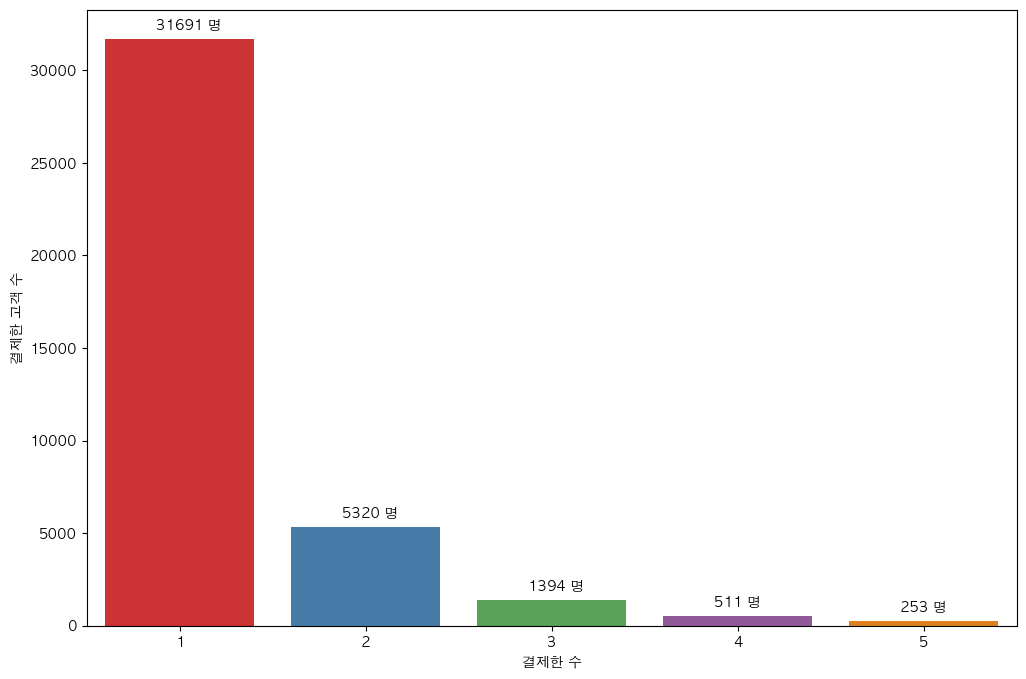

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=df_cus['count'], data=df_cus, palette="Set1", order=[1,2,3,4,5])
plt.xlabel('결제한 수')
plt.ylabel('결제한 고객 수')

for p in ax.patches:
        ax.annotate('{} 명'.format(p.get_height()), (p.get_x() + 0.27, p.get_height() + 500))

이 차트를 보시면 같은 고객이 

- 2번 결제한 비율 16.8% 
- 3번 결제한 비율 4.4% 
- 4번 결제한 비율 1.6% 
- 5번 결제한 비율 0.8% 입니다.

재구매율이 낮다고 판단되어, 다양한 분석을 통해 재구매율 증가를 위한 전략을 세워보면 좋을 것 같습니다.

In [17]:
pm1 = round(len(df_cus[df_cus['count'] == 2]) / len(df_cus[df_cus['count'] == 1])* 100,1) 
pm2 = round(len(df_cus[df_cus['count'] == 3]) / len(df_cus[df_cus['count'] == 1])* 100,1)
pm3 = round(len(df_cus[df_cus['count'] == 4]) / len(df_cus[df_cus['count'] == 1])* 100,1)
pm4 = round(len(df_cus[df_cus['count'] == 5]) / len(df_cus[df_cus['count'] == 1])* 100,1)


print(f"2번 결재률 : {pm1}% \n3번 결재률 : {pm2}% \n4번 결재률 : {pm3}% \n5번 결재률 : {pm4}% \n")

2번 결재률 : 16.8% 
3번 결재률 : 4.4% 
4번 결재률 : 1.6% 
5번 결재률 : 0.8% 



#### 전체 카테고리별 결제건수 확인

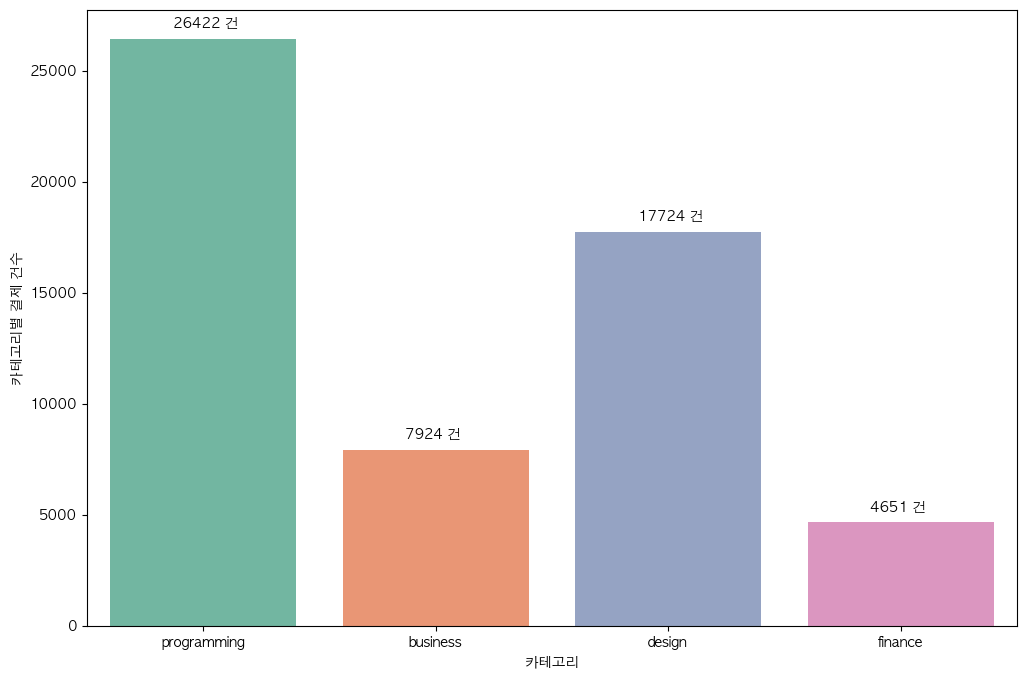

In [18]:
plt.figure(figsize=(12,8))
ax2 = sns.countplot(x=df['big_category_title'],palette="Set2")
plt.xlabel('카테고리')
plt.ylabel('카테고리별 결제 건수')

for p in ax2.patches:
        ax2.annotate('{} 건'.format(p.get_height()), (p.get_x() + 0.27, p.get_height() + 500))

- 가장 많은것은 역시 프로그래밍이고 그다음으로 디자인 그다음으로 비지니스 가장 낮은게 파이낸스인걸 확인할 수 있습니다. 

- 생각보다 디자인쪽 분야의 강의를 찾는사람이 많다는 것을 알 수 있었습니다. 

### 월별

#### 결제 건수

In [19]:
# data
df_m_pm = df.groupby('month').agg({"is_payment" : "sum"}).reset_index()
df_m_pm['month_text'] = df_m_pm['month'].apply(lambda x: calendar.month_abbr[x])
df_m_pm['text'] = df_m_pm['month_text'] + ' - ' + df_m_pm['is_payment'].astype(str) 

df_w_pm = df.groupby('week').agg({"is_payment" : "sum"}).reset_index()
df_q_pm = df.groupby('quarter').agg({"is_payment" : "sum"}).reset_index()

# chart color
df_m_pm['color'] = '#e8daff'
df_m_pm['color'][:-1] = '#f6f2ff'
df_m_pm['color'][:-1:2] = '#e8daff'
df_w_pm['color'] = '#f6f2ff'

# chart
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.08,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Number of Payment Analysis", "Quarter wise Number of Payment Analysis", 
                                    "Week wise Number of Payment Analysis"))

fig.add_trace(go.Bar(x=df_m_pm['is_payment'],
                     y=df_m_pm['month'],
                     marker=dict(color= df_m_pm['color']),
                     text=df_m_pm['text'],
                     textposition='auto',
                     name='Month',
                     orientation='h'
                    ), 
              row=1, col=1
             )

fig.add_trace(go.Pie(values=df_q_pm['is_payment'], 
                     labels=df_q_pm['quarter'], 
                     name='Quarter',
                     marker=dict(colors=['#e8daff','#d4bbff','#be95ff','#a56eff','#8a3ffc']), 
                     hole=0.7,
                     hoverinfo='label+percent+value', 
                     textinfo='label+percent'), 
                     row=1, col=2)

fig.add_trace(go.Scatter(x=df_w_pm['week'], 
                         y=df_w_pm['is_payment'], 
                         mode='lines+markers', 
                         fill='tozeroy', 
                         fillcolor='#f6f2ff',
                         marker=dict(color= '#be95ff'), 
                         name='Week'
                        ), 
              row=2, col=1
             )

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_pm.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Number of Payment Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

/var/folders/jt/ypjr9r4j7tq32qxlbpbg_p2c0000gn/T/ipykernel_2382/302055241.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/ypjr9r4j7tq32qxlbpbg_p2c0000gn/T/ipykernel_2382/302055241.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*   바 차트를 보셨을때 4월에서 5월은 결제 건수가 증가하였지만 7월까지 계속 하락세를 타며 갑자기 8월에서 결제건수가 증가한걸 볼 수 있습니다.이 점을 분석하여 차이를 찾아내 결제량이 증가한 이유를 찾아내보면 좋겠다고 생각했습니다.
<br>
<br>
*   도넛 차트는 4분기로 나눠서 차트를 나타낸것입니다. 1월 2월 3월, 9월 10월 11월 12월의 데이터가 부족하여 큰 의미는 없는 차트이지만 년도별로 다양한 데이터가 있었으면 더 좋았겠다는 생각을 하며 차트를 넣어봤습니다.
<br>
<br>
*   선 그래프는 주단위로 결제량을 나타낸 그래프 입니다. 주단위로 의미를 찾아내 여러 분석을 할 수 있을 것으로 보입니다.

#### 환불 건수

In [20]:
# data
df_m_rf = df.groupby('month').agg({"is_refund" : "sum"}).reset_index()
df_m_rf['month_text'] = df_m_rf['month'].apply(lambda x: calendar.month_abbr[x])
df_m_rf['text'] = df_m_rf['month_text'] + ' - ' + df_m_rf['is_refund'].astype(str) 

df_w_rf = df.groupby('week').agg({"is_refund" : "sum"}).reset_index()
df_q_rf = df.groupby('quarter').agg({"is_refund" : "sum"}).reset_index()
# chart color
color_set = ["#edf5ff", "#d0e2ff"]

df_m_rf['color'] = '#d0e2ff'
df_m_rf['color'][:-1] = '#edf5ff'
df_m_rf['color'][:-1:2] = '#d0e2ff'
df_w_rf['color'] = '#edf5ff'


# chart
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.08,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Number of Refund Analysis", "Quarter wise Number of Refund Analysis", 
                                    "Week wise Number of Refund Analysis"))

fig.add_trace(go.Bar(x=df_m_rf['is_refund'], 
                     y=df_m_rf['month'], 
                     marker=dict(color= df_m_rf['color']),
                     text=df_m_rf['text'],
                     textposition='auto',
                     name='Month', 
                     orientation='h'
                    ), 
              row=1, col=1
             )

fig.add_trace(go.Pie(values=df_q_rf['is_refund'], 
                     labels=df_q_rf['quarter'], 
                     name='Quarter',
                     marker=dict(colors=['#edf5ff','#a6c8ff','#4589ff','#0043ce','#001d6c']), 
                     hole=0.7,
                     hoverinfo='label+percent+value', 
                     textinfo='label+percent'
                    ), 
              row=1, col=2
             )

fig.add_trace(go.Scatter(x=df_w_rf['week'], 
                         y=df_w_rf['is_refund'], 
                         mode='lines+markers', 
                         fill='tozeroy', 
                         fillcolor='#edf5ff',
                         marker=dict(color= '#78a9ff'), 
                         name='Week'
                        ), 
              row=2, col=1
             )

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_rf.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Number of Refund Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

/var/folders/jt/ypjr9r4j7tq32qxlbpbg_p2c0000gn/T/ipykernel_2382/3545505822.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/ypjr9r4j7tq32qxlbpbg_p2c0000gn/T/ipykernel_2382/3545505822.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*   4월하고 8월이 가장 환불 건수가 많습니다.
<br><br>
*   6월부터 갑자기 환불건이 증가하는 이유에 대해 분석하여 문제점이 있다면 해결방안을 모색해봐야 할 것입니다.

In [21]:
#### 환불 건수

# data
df_m_rf = df.groupby('month').agg({"is_refund" : "sum"}).reset_index()
df_m_rf['month_text'] = df_m_rf['month'].apply(lambda x: calendar.month_abbr[x])
df_m_rf['text'] = df_m_rf['month_text'] + ' - ' + df_m_rf['is_refund'].astype(str) 

df_w_rf = df.groupby('week').agg({"is_refund" : "sum"}).reset_index()
df_q_rf = df.groupby('quarter').agg({"is_refund" : "sum"}).reset_index()
# chart color
color_set = ["#edf5ff", "#d0e2ff"]

df_m_rf['color'] = '#d0e2ff'
df_m_rf['color'][:-1] = '#edf5ff'
df_m_rf['color'][:-1:2] = '#d0e2ff'
df_w_rf['color'] = '#edf5ff'


# chart
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.08,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Number of Refund Analysis", "Quarter wise Number of Refund Analysis", 
                                    "Week wise Number of Refund Analysis"))

fig.add_trace(go.Bar(x=df_m_rf['is_refund'], 
                     y=df_m_rf['month'], 
                     marker=dict(color= df_m_rf['color']),
                     text=df_m_rf['text'],
                     textposition='auto',
                     name='Month', 
                     orientation='h'
                    ), 
              row=1, col=1
             )

fig.add_trace(go.Pie(values=df_q_rf['is_refund'], 
                     labels=df_q_rf['quarter'], 
                     name='Quarter',
                     marker=dict(colors=['#edf5ff','#a6c8ff','#4589ff','#0043ce','#001d6c']), 
                     hole=0.7,
                     hoverinfo='label+percent+value', 
                     textinfo='label+percent'
                    ), 
              row=1, col=2
             )

fig.add_trace(go.Scatter(x=df_w_rf['week'], 
                         y=df_w_rf['is_refund'], 
                         mode='lines+markers', 
                         fill='tozeroy', 
                         fillcolor='#edf5ff',
                         marker=dict(color= '#78a9ff'), 
                         name='Week'
                        ), 
              row=2, col=1
             )

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_rf.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Number of Refund Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

*   4월하고 8월이 가장 환불 건수가 많습니다.
<br><br>
*   6월부터 갑자기 환불건이 증가하는 이유에 대해 분석하여 문제점이 있다면 해결방안을 모색해봐야 할 것입니다.

SyntaxError: invalid syntax (3207182072.py, line 77)

#### 매출금액

In [ ]:
df[payment].groupby('month').agg({"transaction_amount" : "sum"}).reset_index()

In [ ]:
# data
df_m_pm_tp = df[payment].groupby('month').agg({"transaction_amount" : "sum"}).reset_index()
df_m_pm_tp['month_text'] = df_m_pm_tp['month'].apply(lambda x: calendar.month_abbr[x])
df_m_pm_tp['text'] = df_m_pm_tp['month_text'] + ' - ' + df_m_pm_tp['transaction_amount'].astype(str) 

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=df_m_pm_tp['month_text'], 
                             y=df_m_pm_tp['transaction_amount'],
                             text=df_m_pm_tp['text']
                             )])

# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='2021, Monthly Sales Amount Report')
fig.show()

*   월 단위 매출액을 바차트입니다.
<br><br>
*   월단이 결제건수 차트와 비교해봤을때 5월과 7월의 결제 건수는 낮게 나오지만 매출 금액에서는 가장 높은걸 확인 할 수 있습니다. 
<br><br>
*   두 차이를 보고 추측할 수 있는 점은 B2C 고객보다 B2B 고객이 많아 매출금액이 높을 수 있다 입니다.
<br><br>
*   B2C와 B2B 매출 금액에 대하여 분석해 보면 좋을 것 같습니다.

#### 환불금액

In [ ]:
df[refund].groupby('month').agg({"transaction_amount" : "sum"}).abs().reset_index()

In [ ]:
# data
df_m_pm_tr = df[refund].groupby('month').agg({"transaction_amount" : "sum"}).abs().reset_index()
df_m_pm_tr['month_text'] = df_m_pm_tr['month'].apply(lambda x: calendar.month_abbr[x])
df_m_pm_tr['text'] = df_m_pm_tr['month_text'] + ' - ' + df_m_pm_tr['transaction_amount'].astype(str) 

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=df_m_pm_tr['month_text'], 
                             y=df_m_pm_tr['transaction_amount'],
                             text=df_m_pm_tr['text']
                             )])

# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='2021, Monthly refund amount')
fig.show()

*   환불 금액은 환불건과 4월 8월이 가장 많은 부분은 비슷하지만 4월이 8월보다 건수는 적지만 금액은 훨씬 높은 점을 알 수 있다.
<br><br>
*   추측하건데 4월에 B2B고객이 환불을 했을 가능성이 크다

In [ ]:
#### 환불금액

df[refund].groupby('month').agg({"transaction_amount" : "sum"}).abs().reset_index()

# data
df_m_pm_tr = df[refund].groupby('month').agg({"transaction_amount" : "sum"}).abs().reset_index()
df_m_pm_tr['month_text'] = df_m_pm_tr['month'].apply(lambda x: calendar.month_abbr[x])
df_m_pm_tr['text'] = df_m_pm_tr['month_text'] + ' - ' + df_m_pm_tr['transaction_amount'].astype(str) 

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=df_m_pm_tr['month_text'], 
                             y=df_m_pm_tr['transaction_amount'],
                             text=df_m_pm_tr['text']
                             )])

# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='2021, Monthly refund amount')
fig.show()

*   환불 금액은 환불건과 4월 8월이 가장 많은 부분은 비슷하지만 4월이 8월보다 건수는 적지만 금액은 훨씬 높은 점을 알 수 있다.
<br><br>
*   추측하건데 4월에 B2B고객이 환불을 했을 가능성이 크다

#### 카테고리별 결제건수

In [ ]:
df[payment].groupby('big_category_title').size()

In [ ]:
df_m_pm_ct_p = df[payment].groupby('month').agg({"is_programming" : "sum"}).reset_index()
df_m_pm_ct_p['month_text'] = df_m_pm_ct_p['month'].apply(lambda x: calendar.month_abbr[x])

df_m_pm_ct_d = df[payment].groupby('month').agg({"is_design" : "sum"}).reset_index()
df_m_pm_ct_d['month_text'] = df_m_pm_ct_d['month'].apply(lambda x: calendar.month_abbr[x])

df_m_pm_ct_b = df[payment].groupby('month').agg({"is_business" : "sum"}).reset_index()
df_m_pm_ct_b['month_text'] = df_m_pm_ct_b['month'].apply(lambda x: calendar.month_abbr[x])

df_m_pm_ct_f = df[payment].groupby('month').agg({"is_finance" : "sum"}).reset_index()
df_m_pm_ct_f['month_text'] = df_m_pm_ct_f['month'].apply(lambda x: calendar.month_abbr[x])

data1 = go.Bar(x=df_m_pm_ct_p['month_text'], 
               y=df_m_pm_ct_p['is_programming'], 
               name='programming', 
               text=df_m_pm_ct_p["is_programming"])

data2 = go.Bar(x=df_m_pm_ct_d['month_text'], 
               y=df_m_pm_ct_d['is_design'], 
               name='design',
               text=df_m_pm_ct_d["is_design"])

data3 = go.Bar(x=df_m_pm_ct_b['month_text'], 
               y=df_m_pm_ct_b['is_business'], 
               name='business',
               text=df_m_pm_ct_b["is_business"])

data4 = go.Bar(x=df_m_pm_ct_f['month_text'], 
               y=df_m_pm_ct_f['is_finance'], 
               name='finance',
               text=df_m_pm_ct_f["is_finance"])

layout = go.Layout(title='Population', barmode='stack') # Title 설정 & Stack으로 그리기
 
# 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig = go.Figure(data=[data1, data2, data3, data4], layout=layout)

fig.update_layout(title_text='2021 Payment, Monthly Category Report')
fig.show()

*   카테고리별 결제건수 누적차트이비다. 
<br><br>
*   프로그래밍이 가장 많으며 그 다음으로 디자인, 비지니스 마지막으로 파이낸스 순입니다.
<br><br>
*   전체 카테고리 분석 결과와 크게 다른 점은 없어 보이지만 6월 데이터를 보시면 프로그래밍 결제건은 줄어들고 디자인 결제건은 크게 증가한 것을 확인 할 수 있습니다. 
<br><br>
*   6월에 디자인쪽 강의가 무엇이 달랐었는지 차이점을 분석하여 마케팅에 활용하면 좋을것 같습니다.

#### 카테고리별 환불건수

In [ ]:
df_m_rf_ct_p = df[refund].groupby('month').agg({"is_programming" : "sum"}).reset_index()
df_m_rf_ct_p['month_text'] = df_m_rf_ct_p['month'].apply(lambda x: calendar.month_abbr[x])

df_m_rf_ct_d = df[refund].groupby('month').agg({"is_design" : "sum"}).reset_index()
df_m_rf_ct_d['month_text'] = df_m_rf_ct_d['month'].apply(lambda x: calendar.month_abbr[x])

df_m_rf_ct_b = df[refund].groupby('month').agg({"is_business" : "sum"}).reset_index()
df_m_rf_ct_b['month_text'] = df_m_rf_ct_b['month'].apply(lambda x: calendar.month_abbr[x])

df_m_rf_ct_f = df[refund].groupby('month').agg({"is_finance" : "sum"}).reset_index()
df_m_rf_ct_f['month_text'] = df_m_rf_ct_f['month'].apply(lambda x: calendar.month_abbr[x])

data1 = go.Bar(x=df_m_rf_ct_p['month_text'], 
               y=df_m_rf_ct_p['is_programming'], 
               name='programming', 
               text=df_m_rf_ct_p["is_programming"])

data2 = go.Bar(x=df_m_rf_ct_d['month_text'], 
               y=df_m_rf_ct_d['is_design'], 
               name='design',
               text=df_m_rf_ct_d["is_design"])

data3 = go.Bar(x=df_m_rf_ct_b['month_text'], 
               y=df_m_rf_ct_b['is_business'], 
               name='business',
               text=df_m_rf_ct_b["is_business"])

data4 = go.Bar(x=df_m_rf_ct_f['month_text'], 
               y=df_m_rf_ct_f['is_finance'], 
               name='finance',
               text=df_m_rf_ct_f["is_finance"])

layout = go.Layout(title='Population', barmode='stack') # Title 설정 & Stack으로 그리기
 
# 생성된 Bar 클래스를 리스트로 만들어 data 인자로 설정
fig = go.Figure(data=[data1, data2, data3, data4], layout=layout)

fig.update_layout(title_text='2021 Refund, Monthly Category Report')
fig.show()

* 카테고리는 결제 건수와 비슷하게 환불 건수도 증가와 감소폭이 비슷합니다.

#### 강의 ID 상위 10위

In [ ]:
df_m_pm_ci_t10_3 = df.loc[payment & mar, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_3.columns = ['course_id', 'total']
df_m_pm_ci_t10_3["course_id"] = df_m_pm_ci_t10_3["course_id"].astype(str)

df_m_pm_ci_t10_4 = df.loc[payment & apr, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_4.columns = ['course_id', 'total']
df_m_pm_ci_t10_4["course_id"] = df_m_pm_ci_t10_4["course_id"].astype(str)

df_m_pm_ci_t10_5 = df.loc[payment & may, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_5.columns = ['course_id', 'total']
df_m_pm_ci_t10_5["course_id"] = df_m_pm_ci_t10_5["course_id"].astype(str)

df_m_pm_ci_t10_6 = df.loc[payment & jun, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_6.columns = ['course_id', 'total']
df_m_pm_ci_t10_6["course_id"] = df_m_pm_ci_t10_6["course_id"].astype(str)

df_m_pm_ci_t10_7 = df.loc[payment & jul, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_7.columns = ['course_id', 'total']
df_m_pm_ci_t10_7["course_id"] = df_m_pm_ci_t10_7["course_id"].astype(str)

df_m_pm_ci_t10_8 = df.loc[payment & aug, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_8.columns = ['course_id', 'total']
df_m_pm_ci_t10_8["course_id"] = df_m_pm_ci_t10_8["course_id"].astype(str)

df_m_pm_ci_t10_9 = df.loc[payment & sep, "course_id"].value_counts().head(10).to_frame().reset_index()
df_m_pm_ci_t10_9.columns = ['course_id', 'total']
df_m_pm_ci_t10_9["course_id"] = df_m_pm_ci_t10_9["course_id"].astype(str)

fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

fig.add_trace(go.Bar(x=df_m_pm_ci_t10_3['course_id'], y=df_m_pm_ci_t10_3['total'], name="Mar"),1, 1)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_4['course_id'], y=df_m_pm_ci_t10_4['total'], name="Apr"), 1, 2)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_5['course_id'], y=df_m_pm_ci_t10_5['total'], name="May"), 1, 3)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_6['course_id'], y=df_m_pm_ci_t10_6['total'], name="Jun"), 1, 4)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_7['course_id'], y=df_m_pm_ci_t10_7['total'], name="Jul"), 2, 1)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_8['course_id'], y=df_m_pm_ci_t10_8['total'], name="Aug"), 2, 2)
fig.add_trace(go.Bar(x=df_m_pm_ci_t10_9['course_id'], y=df_m_pm_ci_t10_9['total'], name="Sep"), 2, 3)
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='2021 Payment, Monthly Course ID Report'
                 )
fig.show()

*   서브 바 차트를 이용해 결제건수가 가장 높은 강의 ID 왼쪽부터 오른쪽 순서로 나타내었습니다.
<br><br>
*   강의 ID가 0은 결측치 데이터입니다. 데이터 기록을 좀 더 잘해줬으면 좋았겠다는 생각이 들었습니다.
<br><br>
*   결제건수가 높은 ID면 강의 질이 좋거나 사람들이 선호하는 강의의 확률이 높을것이라 생각되어
<br><br>
*   해당 강의 강사를 밀어주거나 광고를 하여 효과를 매출 극대화 시키면 좋을것이라 판단됩니다.
<br><br>
*   5월과 7월의 데이터를 보면 Top3의 강의가 4~10위의 강의 결제건수를 합친거와 비슷하거나 많아보입니다. 
<br><br>
*   이 부분을 자세히 분석하여 다른 강의 결제건도 어떤식으로 올릴 수 있을 것인지 알아보면 좋겠습니다.

#### 인기 많은 강의명

In [ ]:
# 전체
text = " ".join(i for i in df['course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('책_검은배경.jpeg')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=150, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*   전체기간에서 강의명에 많이 사용되는 단어들을 Word Cloud를 이용하여 시각화 하였습니다.
<br><br>
*   웹 개발, Java Spring 단어가 포함된 강의가 가장 많이 결제 되었으며 그 다음으로 앱 개발, 데이터 분석 등이 있습니다.
<br><br>
*   웹 개발 분야가 가장 결제건수가 많다는 것을 알 수 있습니다.

In [ ]:
# 3월
text = " ".join(i for i in df.loc[mar,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('mar.jpeg')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* 전체기간 데이터와 비슷하게 웹 개발, Java Spring 이 가장 많으며 영상, 촬영, PPT 등 디자인 관련 강의들도 보입니다.

In [ ]:
# 4월
text = " ".join(i for i in df.loc[apr,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('apr.png')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* 여전히 웹 개발이 인기며 그 다음으로 온라인 완주반하고 패스라는 단어가 나오기 시작했습니다.
<br><br>
* 온라인 완주반이 왜 뜨기 시작했는지 어떤 마케팅 전략을 사용했는지 분석하여 같은 마케팅 전략을 시도해봐도 좋을것입니다.

In [ ]:
# 5월
text = " ".join(i for i in df.loc[may,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('may.png')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*   전체 및 3월 4월 데이터와는 다르게 5월에서는 웹이 인기 단어가 아닙니다.
<br><br>
*   취업완성 스쿨이라는 단어가 가장 먼저 보인다.
<br><br>
*   이 자료를 보고 추측해보건데, 5월부터는 사람들이 취업에 관심이 많아지는 시기인거 같습니다.

In [ ]:
# 6월
text = " ".join(i for i in df.loc[jun,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('mar.jpeg')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*   6월, 프리패스라는 단어가 많이 보입니다.
<br><br>
*   6월이라는 단어가 들어간 강의들이 인기라는 걸 보고 추측하건데, 월 단위 이벤트가 효과가 있음을 알 수 있습니다
<br><br>
*   김영하 작가의 강의가 인기가 많았다는 것을 알 수 있다. 유명인들을 포섭하는것도 좋은 마케팅 전략인거 같습니다.

In [ ]:
# 7월
text = " ".join(i for i in df.loc[jul,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('jul.png')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*   이미지를 보면 알 수 있듯이 칼퇴를 정말 하고싶나봅니다
<br><br>
*   직장인들을 대상으로한 강의도 인기가 좋은것을 확인할 수 있었습니다. 직장인 이벤트를 진행해봐도 좋을것입니다.
<br><br>
*   김영하 작가의 강의도 여전히 인기입니다.

In [ ]:
# 8월
text = " ".join(i for i in df.loc[aug,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('apr.png')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=400, 
                      height=400, 
                      scale=2.0, 
                      max_font_size=250, 
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* 웹이 다시 많아 졌으며, 영상관련 강의들도 많이 보입니다.

In [ ]:
# 9월
text = " ".join(i for i in df.loc[sep,'course_title'])

stopwords = set(STOPWORDS)
stopwords.add("올인원")
stopwords.add("초격차")
stopwords.add("패키지")
stopwords.add("번에")
stopwords.add("한번에")
stopwords.add("끝내는")
stopwords.add("한")

img = Image.open('sep.png')
img_array = np.array(img)

wordcloud = WordCloud(font_path='AppleGothic',
                      background_color="white",
                      width=1000, 
                      height=1000, 
                      scale=2.0, 
                      max_font_size=200,
                      mask=img_array,
                      stopwords=stopwords).generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* 앱 개발과, 9월 프리패스가 가장 많고 그 다음으로 데이터 분석 그리고 영상관련 단어들입니다.

**결론**
<br><br>
*   월마다 가장 인기가 많은 단어들이 바뀌는 것을 보고 트렌드가 달라지거나 마케팅에 따라 인기 강의들이 달라지는 것을 확인 할 수 있었습니다.
<br><br>
*   월별 또는 분기별로 마케팅 전략을 다르게 진행하여 매출을 극대화 시킬수 있는 전략을 구성해보면 좋을것입니다.

## 요일별

### 결제건수

In [ ]:
# data
df_d_pm = df.groupby('day_of_week').agg({"is_payment" : "sum"}).reset_index()

# chart
fig = px.bar(df_d_pm, y='day_of_week', x='is_payment', 
             title='Number of Payment vs Day of Week',
             color="day_of_week",
             orientation="h", 
             color_discrete_sequence=['#e8daff','#f6f2ff'], text='is_payment',
             category_orders=dict(day_of_week=["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]))
fig.update_yaxes(showgrid=False, ticksuffix=' ', showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60, b=0, l=0, r=0), height=350,
                  hovermode="y unified", 
                  yaxis_title=" ", template='plotly_white',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"))

*   차트를 보면 월요일이 가장 결제 건수가 높고 토요일이 가장 낮은 걸 확인 할 수 있습니다.
<br><br>
*   월요일에 결제 건수가 많다는건 이용고객이 많다고 추측해 볼 수 있고, 월요일에 쿠폰을 발급하는 이벤트 전략을 세워봐도 좋을것입니다.

### 환불건수

In [ ]:
# data
df_d_rf = df.groupby('day_of_week').agg({"is_refund" : "sum"}).reset_index()

# chart
fig = px.bar(df_d_rf, 
             y='day_of_week', 
             x='is_refund',
             title='Number of Refund vs Day of Week',
             color="day_of_week",
             orientation="h",
             color_discrete_sequence=['#d0e2ff','#edf5ff'],
             text='is_refund',
             category_orders=dict(day_of_week=["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"])
            )

fig.update_yaxes(showgrid=False, ticksuffix=' ', showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60, b=0, l=0, r=0), height=350,
                  hovermode="y unified", 
                  yaxis_title=" ", template='plotly_white',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"))

*   역시나 결제 건수와 똑같이 월요일이 가장 환불 건수가 많습니다. 
<br><br>
*   토요일하고 일요일에는 환불건수가 없는걸 보니 직원들이 주말에 일을 안한다는 것을 확인할 수 있었습니다.

## 시간대별 결제 & 환불

In [ ]:
# data
df_h_p = df[payment].groupby('hour').size().to_frame().reset_index()
df_h_p.columns = ['hour', 'total']
df_h_p.hour = df_h_p.hour.astype(str) + "시"

df_h_r = df[refund].groupby('hour').size().to_frame().reset_index()
df_h_r.columns = ['hour', 'total']
df_h_r.hour = df_h_r.hour.astype(str) + "시"

# chart
fig = go.Figure()

fig.add_trace(go.Bar(x=df_h_p.hour, 
                     y=df_h_p.total,
                     name='Payment',
                    text=df_h_p.total))

fig.add_trace(go.Bar(x=df_h_r.hour, 
                     y=df_h_r.total,
                     name='Refund',
                     text=df_h_r.total
                ))
fig.update_layout(title_text='2021 시간대별 결제 & 환불')
fig.show()

*   결제건수
    *   오후 11시~12시 사이가 가장 결제 건수가 많은걸 확인 할 수 있습니다.
    *   시간 이벤트를 한다고하면 늦은 저녁시간이 가장 좋을것같습니다.
<br><br>
*   환불건수
    *   환불은 직원들이 일하는 시간인 10시 ~ 7시까지가 분포되어있고 나머지는 시간대는 환불건이 없다는걸 확인할 수 있다.
    *   특이하게 점심시간인 12시는 환불 건수가 없다. 추측하건데 직원들도 밥은 먹고 살아야 하니까..